# 第3章  决策树

## 本章内容

* 决策树简介
* 在数据集中度量一致性
* 使用递归构造决策树
* 使用Matplotlib绘制树形图

## 3.1 决策树 概述

**决策树（Decision Tree）**算法是一种基本的分类和回归方法，是最经常使用的数据挖掘算法之一，但是这里我们先讨论用于**分类**的决策树。

**决策树模型**：呈树形结构，在分类问题中，表示基于特征对实例进行分类的过程。它可以认为是 **if-then**规则的集合，也可以认为是定义在特征空间与类空间上的条件概率分布。

**决策树**学习通常包含以下三个步骤：

1. 特征选择
2. 决策树生成
3. 决策树修剪

## 3.2 决策树 应用场景

这里以一个经典的“二十个问题”的游戏描述开始：

游戏规则：

参与游戏的一方在脑海中构想一个事物，其他参与者向他提问，只允许提20个问题，问题的答案也只能用对或者错回答。问问题的人通过推断分解，逐步的缩小猜想事物的范围，最后得到游戏的答案 --- 是一个什么样的场景。


另一个比较能说明问题的例子是邮件分类系统，大致工作流程如下：

![](images/decision_tree_email.jpg)

首先检测发送邮件的域名地址，如果地址为 myEmployer.com，则将其放在分类 “无聊时需要阅读的邮件”中。如果邮件不是来自这个域名，则检测邮件内容是否包含单词“曲棍球”，如果包含则将邮件归类到“需要及时处理的朋友邮件”，否则归类到“无需阅读的垃圾邮件”。

## 3.3 决策树 定义

**分类决策树模型**是一种描述对实例进行分类的树形结构。决策树由节点（node）和有向边（directed edge）组成。节点有两种类型：

* 内部节点（internal node）：表示一个特征或属性
* 叶节点（leaf node）：表示一个类

用决策树分类，从根节点开始，对实例的某一特征进行测试，根据测试结果，将实例分配到其子节点，此时，每个子节点对应着该特征的一个取值。如此递归地对实例进行测试并分配，直至达到叶节点，最后将实例分配到到叶节点的类中。

## 3.4 决策树 工作原理

**信息熵 & 信息增益**

**熵（entropy）**：指的是体系的混乱程度，在不同的学科中也有引申出的更为具体的定义，是领域十分重要的参量。(后面详解)

**信息熵（香农熵）**：是一种信息的度量方式，表示信息的混乱程度，也就是说：信息越有序，信息熵越低。例如：火柴有序放在火柴盒里，熵值最低，相反，熵值很高。(后面详解)

**信息增益**：在划分数据集前后信息发生的变化成为信息增益。(后面详解)

**决策树构造**（伪代码）

*createBranch()*
```
检测数据集中每个子项是否属于同一分类：
    If so return 类标签;
    Else
        寻找划分数据集的最好特征
        划分数据集
        创建分支点
            for 每个划分的子集
                调用构建决策树函数，并增加返回结果到分支节点中
        return 分直节点
```

## 3.5 决策树 工作流程

1. 收集数据：可以使用任何方法
2. 准备数据：树构造算法只适用于标称型数据，因此数值型数据必须离散化
3. 分析数据：可以使用任何方法，构造树完成之后，我们应该检查图像是否符合预期
4. 训练算法：构造树的数据结构
5. 测试算法：使用经验树计算错误率
6. 使用算法：此步骤可以适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义

## 3.6 决策树 特点

* **优点**：计算复杂度不高，输出结果易于理解，对中间值的缺失不敏感，可以处理不相关特征数据；
* **缺点**：可能会产生过度匹配的问题
* **使用数据类型**：数值型和标称型

## 3.7 决策树 项目实践

### 实践1： 判定是否是鱼类

#### 项目概述

根据以下两个特征，判断该动物是否为鱼类。

特征：

1. 不浮出水面是否可以生存
2. 是否有脚蹼

#### 开发流程

1. 收集数据：可以使用任何方法
2. 准备数据：树构造算法只适用于标称型数据，因此数值型数据必须离散化
3. 分析数据：可以使用任何方法，构造树完成之后，我们应该检查图形是否符合预期
4. 训练算法：构造树的数据结构
5. 测试算法：使用决策树执行分类
6. 使用算法：此步骤可以适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义

**1. 收集数据**：可以使用任何方法

假设我们得到的数据集如下：

![](images/fish_or_not.png)

**2. 准备数据**：树构造算法只适用于标称型数据，因此数值型数据必须离散化

现在我们想要决定依据第一个特征还是第二个特征划分数据，但是在这之前，我们必须采用量化的方法判断如何划分数据。

我们构建自己的 *createDataSet()* 方法，将标称型的数据离散化。

In [108]:
import operator
from collections import Counter
from math import log


# 构建数据样本集（数据变化）
def createDataSet():
    dataSet = [
        [1, 1, 'yes'],
        [1, 1, 'yes'],
        [1, 0, 'no'],
        [0, 1, 'no'],
        [0, 1, 'no']
    ]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

**3. 分析数据**：可以使用任何方法，构造树完成之后，我们应该检查图形是否符合预期


**3.1 信息增益（information gain）**

划分数据集的大原则是：**将无序的数据变得更加有序。**
组织杂乱无章数据的一种方法：**使用信息论度量信息，信息论是量化处理信息的分支科学。**

**信息增益 定义**

在划分数据之前后，信息发生的变化成为信息增益。

**如何计算信息增益**

**香农熵（简称熵）**：是集合信息的度量方式，定义为信息的期望值。

**信息 定义**

如果待分类的事物可能被划分在多个分类中，则符号$x_i$事物的信息定义为：

$$l(x_i) = -\log_2{p(x_i)}$$

其中 $p(x_i)$ 是选择该分类的概率。

但是为了计算熵，需要计算所有类别所有可能值包含的信息期望值，通过如下公式得到：

$$H = -\sum_{i=1}^{n}p(x_i)\log_2{p(x_i)}$$

其中$n$为分类的数目。

了解了**香农熵**计算方式之后，我们来实现香农熵的函数：

In [109]:
# 计算给定数据集的香农熵的函数
def calcShannonEnt(dataSet):
    """calcShannonEnt(calculate Shannon entropy 计算给定数据集的香农熵)

    Args:
        dataSet 数据集
    Returns:
        返回 每一组feature下的某个分类下，香农熵的信息期望
    """
    # 求list的长度，表示计算参与训练的数据量
    numEntries = len(dataSet)
    # 下面输出我们测试的数据集的一些信息
    # 例如：<type 'list'> numEntries:  5 是下面的代码的输出
    # print type(dataSet), 'numEntries: ', numEntries

    # 计算分类标签label出现的次数
    labelCounts = {}
    # the the number of unique elements and their occurance
    for featVec in dataSet:
        # 将当前实例的标签存储，即每一行数据的最后一个数据代表的是标签
        currentLabel = featVec[-1]
        # 为所有可能的分类创建字典，如果当前的键值不存在，则扩展字典并将当前键值加入字典。每个键值都记录了当前类别出现的次数。
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
        # print '-----', featVec, labelCounts

    # 对于label标签的占比，求出label标签的香农熵
    shannonEnt = 0.0
    for key in labelCounts:
        # 使用所有类标签的发生频率计算类别出现的概率。
        prob = float(labelCounts[key])/numEntries
        # log base 2
        # 计算香农熵，以 2 为底求对数
        shannonEnt -= prob * log(prob, 2)
        # print '---', prob, prob * log(prob, 2), shannonEnt
    return shannonEnt

获取熵之后，我们就可以按照获取最大信息增益的方法划分数据集了。

> 还有一种度量数据无需程度的方法：**基尼不纯度(Gini impurity)**，简单地说就是从一个数据集中随机选取子项，度量其被错误分类到其他类别中的概率。

**3.2 划分数据集**

有了上面的知识储备后，我们就可以开始划分数据集并度量划分数据集的熵信息，判断是否正确划分数据集了。

划分数据集的函数如下：

In [110]:
# 按照给定的特征划分数据集
def splitDataSet(dataSet, index, value):
    """splitDataSet(通过遍历dataSet数据集，求出index对应的colnum列的值为value的行)
        就是依据index列进行分类，如果index列的数据等于 value的时候，就要将 index 划分到我们创建的新的数据集中
    Args:
        dataSet 数据集                 待划分的数据集
        index 表示每一行的index列        划分数据集的特征
        value 表示index列对应的value值   需要返回的特征的值。
    Returns:
        index列为value的数据集【该数据集需要排除index列】
    """
    retDataSet = []
    for featVec in dataSet:
        # 抽取axis列的值为value的数据
        if featVec[index] == value:
            reducedFeatVec = featVec[:index]
            # extend 合并数据
            reducedFeatVec.extend(featVec[index + 1:])
            # 追加到数据list中
            retDataSet.append(reducedFeatVec)
    return retDataSet

接下来我们将遍历整个数据集，循环计算香农熵和划分数据集，找到最好的特征划分方式，熵计算将会告诉我们如何划分数据集是最好的数据组织方式。

In [111]:
# 选择最好的数据集划分方式
def chooseBestFeatureToSplit(dataSet):
    """
    Args:
        dataSet 数据集
    Returns:
        bestFeature 最优的特征列
    """
    # 获取第一行有多少特征，由于最后一列是分类标签，因此数量-1
    numFeatures = len(dataSet[0]) - 1
    # label的信息熵
    baseEntropy = calcShannonEnt(dataSet)
    # 最优的信息增益值, 和最优的Featurn编号
    bestInfoGain, bestFeature = 0.0, -1
    # iterate over all the features
    for i in range(numFeatures):
        # create a list of all the examples of this feature
        # 获取每一个实例的第i+1个feature，组成list集合
        featList = [example[i] for example in dataSet]
        # get a set of unique values
        # 获取剔重后的集合，使用set对list数据进行去重
        uniqueVals = set(featList)
        # 创建一个临时的信息熵
        newEntropy = 0.0
        # 遍历某一列的value集合，计算该列的信息熵 
        # 遍历当前特征中的所有唯一属性值，对每个唯一属性值划分一次数据集，计算数据集的新熵值，并对所有唯一特征值得到的熵求和。
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        # gain[信息增益]: 划分数据集前后的信息变化， 获取信息熵最大的值
        # 信息增益是熵的减少或者是数据无序度的减少。最后，比较所有特征中的信息增益，返回最好特征划分的索引值。
        infoGain = baseEntropy - newEntropy
        print('infoGain=', infoGain, 'bestFeature=', i, baseEntropy, newEntropy)
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

可以看到，原始数据中，第0个特征是最好的用于划分数据集的特征。

**4. 训练算法**：构造树的数据结构

从数据集构造决策树算法所需要的子功能模块已经完成了，其工作原理如下：

* 得到原始数据集
* 基于做好的属性值划分数据集
    * 由于特征值可能多于两个，因此可能存在大于两个分支的数据集划分
* 首次划分后，数据将被向下传递到树分支的下一个节点
* 根据实际情况，可再次划分数据

因此我们可以采用递归的原则处理数据集。递归结束的条件是：

**程序遍历完所有划分数据集的属性，或者每个分支下的所有实例都具有相同的分类。如果所有实例具有相同的分类，则得到一个叶子节点或者终止块。**

如上述分类鱼类与非鱼类的例子描述，刻画出如下的数据路径：

![](images/fish_data_flow.png)

但是，有些情况下，我们处理了数据集所有的属性，但是类标签在叶子节点上依然不是唯一的，此时我们就需要采用多数表决的方式决定该叶子节点的分类。

In [112]:
# 分类表决决定叶子节点分类
def majorityCnt(classList):
    classCount = {}
    # 遍历所有的标签列表，统计标签数量
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    # 对统计结果进行排序
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0]

In [113]:
# 创建树的数据结构
def createTree(dataSet, labels):
    # 获取分类标签列表
    classList = [example[-1] for example in dataSet]
    # 如果数据集的最后一列的第一个值出现的次数=整个集合的数量，也就说只有一个类别，就只直接返回结果就行
    # 第一个停止条件：所有的类标签完全相同，则直接返回该类标签。
    # count() 函数是统计括号中的值在list中出现的次数
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 如果数据集只有1列，那么最初出现label次数最多的一类，作为结果
    # 第二个停止条件：使用完了所有特征，仍然不能将数据集划分成仅包含唯一类别的分组。
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)

    # 选择最优的列，得到最优列对应的label含义
    bestFeat = chooseBestFeatureToSplit(dataSet)
    # 获取label的名称
    bestFeatLabel = labels[bestFeat]
    # 初始化myTree
    myTree = {bestFeatLabel: {}}
    # 注：labels列表是可变对象，在PYTHON函数中作为参数时传址引用，能够被全局修改
    # 所以这行代码导致函数外的同名变量被删除了元素，造成例句无法执行，提示'no surfacing' is not in list
    del(labels[bestFeat])
    # 取出最优列，然后它的branch做分类
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        # 求成剩余标签Label
        subLabels = labels[:]
        # 遍历当前选择的特征包含的所有属性，在每个数据集划分上递归调用createTree()
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

In [124]:
import copy

myDat, classL = createDataSet()
myTree = createTree(myDat, copy.deepcopy(classL))
myTree

infoGain= 0.4199730940219749 bestFeature= 0 0.9709505944546686 0.5509775004326937
infoGain= 0.17095059445466854 bestFeature= 1 0.9709505944546686 0.8
infoGain= 0.9182958340544896 bestFeature= 0 0.9182958340544896 0.0


{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

**使用Matplotlib注解绘制树形图**

**annitations**：Matplotlib提供的注解工具，可以附带文字、箭头等。

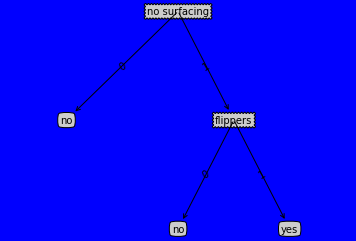

In [125]:
# 附上最终代码
import matplotlib.pyplot as plt

# 定义文本框 和 箭头格式 【 sawtooth 波浪方框, round4 矩形方框 , fc表示字体颜色的深浅 0.1~0.9 依次变浅，没错是变浅】
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")


def getNumLeafs(myTree):
    numLeafs = 0
    firstSides = list(myTree.keys())
    firstStr = firstSides[0]
    secondDict = myTree[firstStr]
    # 根节点开始遍历
    for key in secondDict.keys():
        # 判断子节点是否为dict, 不是+1
        if type(secondDict[key]) is dict:
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs


def getTreeDepth(myTree):
    maxDepth = 0
    firstSides = list(myTree.keys())
    firstStr = firstSides[0]
    secondDict = myTree[firstStr]
    # 根节点开始遍历
    for key in secondDict.keys():
        # 判断子节点是不是dict, 求分枝的深度
        if type(secondDict[key]) is dict:
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        # 记录最大的分支深度
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth


def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction', xytext=centerPt, textcoords='axes fraction', va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)


def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)


def plotTree(myTree, parentPt, nodeTxt):
    # 获取叶子节点的数量
    numLeafs = getNumLeafs(myTree)
    # 获取树的深度
    # depth = getTreeDepth(myTree)

    # 找出第1个中心点的位置，然后与 parentPt定点进行划线
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    # print cntrPt
    # 并打印输入对应的文字
    plotMidText(cntrPt, parentPt, nodeTxt)

    firstSides = list(myTree.keys())
    firstStr = firstSides[0]
    # 可视化Node分支点
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    # 根节点的值
    secondDict = myTree[firstStr]
    # y值 = 最高点-层数的高度[第二个节点位置]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        # 判断该节点是否是Node节点
        if type(secondDict[key]) is dict:
            # 如果是就递归调用[recursion]
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            # 如果不是，就在原来节点一半的地方找到节点的坐标
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            # 可视化该节点位置
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            # 并打印输入对应的文字
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD


def createPlot(inTree):
    # 创建一个figure的模版
    fig = plt.figure(1, facecolor='blue')
    fig.clf()

    axprops = dict(xticks=[], yticks=[])
    # 表示创建一个1行，1列的图，createPlot.ax1 为第 1 个子图，
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)

    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    # 半个节点的长度
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

# # 测试画图
# def createPlot():
#     fig = plt.figure(1, facecolor='white')
#     fig.clf()
#     # ticks for demo puropses
#     createPlot.ax1 = plt.subplot(111, frameon=False)
#     plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
#     plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
#     plt.show()


# 测试数据集
def retrieveTree(i):
    listOfTrees = [
        {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
        {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
    ]
    return listOfTrees[i]


# myTree = retrieveTree(1)
# createPlot(myTree)
    
createPlot(myTree)

**5. 测试算法**：使用决策树执行分类

In [126]:
def classify(inputTree, featLabels, testVec):
    """classify(给输入的节点，进行分类)
    Args:
        inputTree  决策树模型
        featLabels Feature标签对应的名称
        testVec    测试输入的数据
    Returns:
        classLabel 分类的结果值，需要映射label才能知道名称
    """
    # 获取tree的根节点对于的key值 
    firstSides = list(inputTree.keys())
    firstStr = firstSides[0] 
    # 通过key得到根节点对应的value
    secondDict = inputTree[firstStr]
    # 判断根节点名称获取根节点在label中的先后顺序，这样就知道输入的testVec怎么开始对照树来做分类
    featIndex = featLabels.index(firstStr)
    # 测试数据，找到根节点对应的label位置，也就知道从输入的数据的第几位来开始分类
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    print('+++', firstStr, 'xxx', secondDict, '---', key, '>>>', valueOfFeat)
    # 判断分枝是否结束: 判断valueOfFeat是否是dict类型
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else:
        classLabel = valueOfFeat
    return classLabel

In [127]:
classify(myTree, classL, [1, 1])

+++ no surfacing xxx {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}} --- 1 >>> {'flippers': {0: 'no', 1: 'yes'}}
+++ flippers xxx {0: 'no', 1: 'yes'} --- 1 >>> yes


'yes'

**6. 使用算法**：此步骤可以适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义

**保存树的数据结构，以便下次无需重新构建树**

In [128]:
import pickle
# 存储树
def storeTree(inputTree, filename):
    fw = open(filename, 'wb+')
    pickle.dump(inputTree, fw)
    fw.close()

In [150]:
# 加载树
def grabTree(filename):
    import pickle
    fr = open(filename,'rb+')
    return pickle.load(fr)

In [151]:
storeTree(myTree, 'resource/DecisionTree/classifierStorage.txt')

### 实践2： 使用决策树预测隐形眼镜类型

#### 项目概述

隐形眼镜类型包括硬材质、软材质以及不适合佩戴隐形眼镜。我们需要使用决策树预测患者需要佩戴的隐形眼镜类型。

#### 开发流程

1. 收集数据：提供的文本文件
2. 准备数据：解析 tab 键分割的数据行
3. 分析数据：快速检查数据，确保正确地解析数据内容，使用 createPlot() 函数绘制最终的树形图
4. 训练算法：使用 createTree() 函数
5. 测试算法：编写测试函数，验证决策树是否可以正确分类给定的数据实例
6. 使用算法：存储树的数据结构，以便下次使用时无需重新构建树。

**1. 收集数据**：提供的文本文件

In [152]:
fr = open('resource/DecisionTree/lenses.txt')
fr.readlines()

['young\tmyope\tno\treduced\tno lenses\n',
 'young\tmyope\tno\tnormal\tsoft\n',
 'young\tmyope\tyes\treduced\tno lenses\n',
 'young\tmyope\tyes\tnormal\thard\n',
 'young\thyper\tno\treduced\tno lenses\n',
 'young\thyper\tno\tnormal\tsoft\n',
 'young\thyper\tyes\treduced\tno lenses\n',
 'young\thyper\tyes\tnormal\thard\n',
 'pre\tmyope\tno\treduced\tno lenses\n',
 'pre\tmyope\tno\tnormal\tsoft\n',
 'pre\tmyope\tyes\treduced\tno lenses\n',
 'pre\tmyope\tyes\tnormal\thard\n',
 'pre\thyper\tno\treduced\tno lenses\n',
 'pre\thyper\tno\tnormal\tsoft\n',
 'pre\thyper\tyes\treduced\tno lenses\n',
 'pre\thyper\tyes\tnormal\tno lenses\n',
 'presbyopic\tmyope\tno\treduced\tno lenses\n',
 'presbyopic\tmyope\tno\tnormal\tno lenses\n',
 'presbyopic\tmyope\tyes\treduced\tno lenses\n',
 'presbyopic\tmyope\tyes\tnormal\thard\n',
 'presbyopic\thyper\tno\treduced\tno lenses\n',
 'presbyopic\thyper\tno\tnormal\tsoft\n',
 'presbyopic\thyper\tyes\treduced\tno lenses\n',
 'presbyopic\thyper\tyes\tnormal\tno 

**2. 准备数据**：解析 tab 键分割的数据行

In [153]:
fr = open('resource/DecisionTree/lenses.txt')

lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lenses

[['young', 'myope', 'no', 'reduced', 'no lenses'],
 ['young', 'myope', 'no', 'normal', 'soft'],
 ['young', 'myope', 'yes', 'reduced', 'no lenses'],
 ['young', 'myope', 'yes', 'normal', 'hard'],
 ['young', 'hyper', 'no', 'reduced', 'no lenses'],
 ['young', 'hyper', 'no', 'normal', 'soft'],
 ['young', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['young', 'hyper', 'yes', 'normal', 'hard'],
 ['pre', 'myope', 'no', 'reduced', 'no lenses'],
 ['pre', 'myope', 'no', 'normal', 'soft'],
 ['pre', 'myope', 'yes', 'reduced', 'no lenses'],
 ['pre', 'myope', 'yes', 'normal', 'hard'],
 ['pre', 'hyper', 'no', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'no', 'normal', 'soft'],
 ['pre', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'yes', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'normal', 'hard'],
 ['presbyopic', 

**3. 分析数据**：快速检查数据，确保正确地解析数据内容，使用 createPlot() 函数绘制最终的树形图

In [154]:
import copy

lensesTree = createTree(lenses, copy.deepcopy(lensesLabels))
lensesTree

infoGain= 0.03939650364612124 bestFeature= 0 1.3260875253642983 1.286691021718177
infoGain= 0.039510835423565815 bestFeature= 1 1.3260875253642983 1.2865766899407325
infoGain= 0.37700523001147723 bestFeature= 2 1.3260875253642983 0.9490822953528211
infoGain= 0.5487949406953986 bestFeature= 3 1.3260875253642983 0.7772925846688997
infoGain= 0.22125183600446618 bestFeature= 0 1.5545851693377994 1.3333333333333333
infoGain= 0.09543725231055489 bestFeature= 1 1.5545851693377994 1.4591479170272446
infoGain= 0.7704260414863776 bestFeature= 2 1.5545851693377994 0.7841591278514218
infoGain= 0.3166890883150208 bestFeature= 0 0.6500224216483541 0.3333333333333333
infoGain= 0.19087450462110933 bestFeature= 1 0.6500224216483541 0.4591479170272448
infoGain= 1.0 bestFeature= 0 1.0 0.0
infoGain= 0.2516291673878229 bestFeature= 0 0.9182958340544896 0.6666666666666666
infoGain= 0.4591479170272448 bestFeature= 1 0.9182958340544896 0.4591479170272448
infoGain= 0.9182958340544896 bestFeature= 0 0.918295834

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

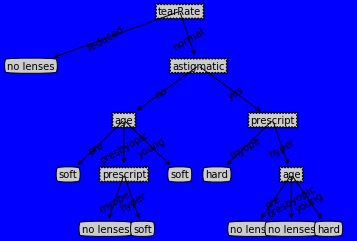

In [155]:
createPlot(lensesTree)

In [156]:
filename = 'resource/DecisionTree/classifierLensesTree.txt'
storeTree(lensesTree, filename)

In [158]:
inputTree = grabTree(filename)

In [162]:
classify(inputTree, lensesLabels, ['presbyopic', 'hyper', 'yes', 'normal'])

+++ tearRate xxx {'reduced': 'no lenses', 'normal': {'astigmatic': {'no': {'age': {'pre': 'soft', 'presbyopic': {'prescript': {'myope': 'no lenses', 'hyper': 'soft'}}, 'young': 'soft'}}, 'yes': {'prescript': {'myope': 'hard', 'hyper': {'age': {'pre': 'no lenses', 'presbyopic': 'no lenses', 'young': 'hard'}}}}}}} --- normal >>> {'astigmatic': {'no': {'age': {'pre': 'soft', 'presbyopic': {'prescript': {'myope': 'no lenses', 'hyper': 'soft'}}, 'young': 'soft'}}, 'yes': {'prescript': {'myope': 'hard', 'hyper': {'age': {'pre': 'no lenses', 'presbyopic': 'no lenses', 'young': 'hard'}}}}}}
+++ astigmatic xxx {'no': {'age': {'pre': 'soft', 'presbyopic': {'prescript': {'myope': 'no lenses', 'hyper': 'soft'}}, 'young': 'soft'}}, 'yes': {'prescript': {'myope': 'hard', 'hyper': {'age': {'pre': 'no lenses', 'presbyopic': 'no lenses', 'young': 'hard'}}}}} --- yes >>> {'prescript': {'myope': 'hard', 'hyper': {'age': {'pre': 'no lenses', 'presbyopic': 'no lenses', 'young': 'hard'}}}}
+++ prescript xxx

'no lenses'